In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
mall=pd.read_csv('MallClusters.csv')
mall

,CustomerID,Gender,Age,Income,Spending_Score,Clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,4
197,198,Male,32,126,74,3
198,199,Male,32,137,18,4


In [19]:
mall.rename(columns={'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'Spending_Score'}, inplace = True)
mall.head()

,CustomerID,Gender,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
mall.describe()

,CustomerID,Age,Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


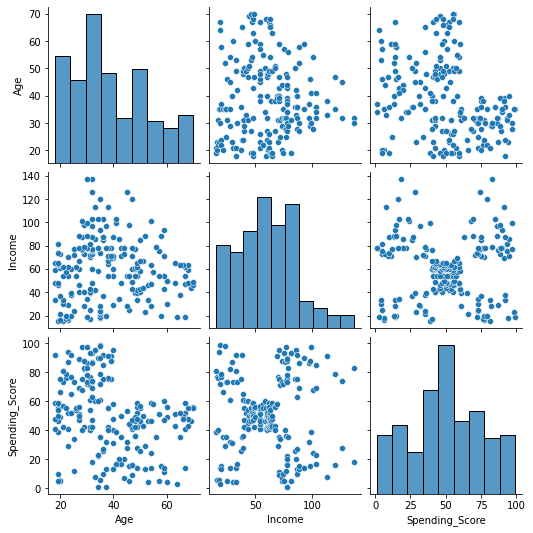

In [22]:
#Plot Age, Income and Spending Score Correlation
sns.pairplot(mall[['Age','Income', 'Spending_Score']])

In [23]:
import sklearn.cluster as cluster

In [ ]:
# We will use 2 Variables for this example
What is init =' k-means ++'?
Image result for what is init in kmeans
'k-means++' : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See section Notes in k_init for more details. 'random': choose n_clusters observations (rows) at random from data for the initial centroids. ... Determines random number generation for centroid initialization.
n_clustersint, default=8
The number of clusters to form as well as the number of centroids to generate.

init{‘k-means++’, ‘random’}, callable or array-like of shape (n_clusters, n_features), default=’k-means++’
Method for initialization:

‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See section Notes in k_init for more details.

‘random’: choose n_clusters observations (rows) at random from data for the initial centroids.

If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.

If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.

n_initint, default=10
Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

max_iterint, default=300
Maximum number of iterations of the k-means algorithm for a single run.
kmeans = cluster.KMeans(n_clusters=5 ,init="k-means++")
kmeans = kmeans.fit(df[['Spending_Score','Income']])

In [25]:
kmeans = cluster.KMeans(n_clusters=5 ,init="k-means++")
kmeans = kmeans.fit(mall[['Spending_Score','Income']])

In [26]:
kmeans.cluster_centers_

array([[49.51851852, 55.2962963 ],
       [17.11428571, 88.2       ],
       [20.91304348, 26.30434783],
       [82.12820513, 86.53846154],
       [79.36363636, 25.72727273]])

In [32]:
#Attach Clusters to the Original Data
mall['Clusters'] = kmeans.labels_

In [29]:
mall

,CustomerID,Gender,Age,Income,Spending_Score,Clusters
0,1,Male,19,15,39,2
1,2,Male,21,15,81,4
2,3,Female,20,16,6,2
3,4,Female,23,16,77,4
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,1


In [31]:
mall['Clusters'].value_counts()

0    81
3    39
1    35
2    23
4    22
Name: Clusters, dtype: int64

In [ ]:
What is cluster centers in K-Means?
The "cluster center" is the arithmetic mean of all the points belonging to the cluster. Each point is closer to its own cluster center than to other cluster centers.

<AxesSubplot:xlabel='Spending_Score', ylabel='Income'>

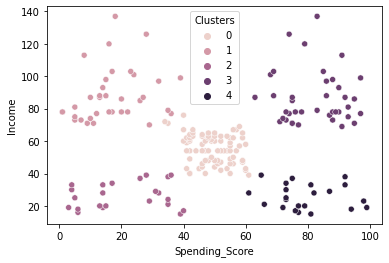

In [34]:
sns.scatterplot(x="Spending_Score", y="Income",hue = 'Clusters',  data=mall)